In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, log_loss, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from GBDT.GradientBoostDecisionTree import GBDTRegressor

In [2]:
data = datasets.load_boston()
x = data.data
y = data.target
x.shape

(506, 13)

## My GBDT

In [3]:
Gbdt = GBDTRegressor(500, 0.1, 'ls', tree_params={'criterion': 'mse', 'max_depth': 3}, subsample=0.5, tol=0.01)
Gbdt.fit(x, y)

early stopping in round 340, best round is 320, M = 340


GBDTRegressor(learning_rate=0.1, loss='ls', n_estimators=340,
              n_iter_no_change=2, random_state=None, subsample=0.5, tol=0.0025,
              tree_params={'criterion': 'mse', 'max_depth': 3})

In [4]:
r2_score(y, Gbdt.predict(x))

0.9868745241700069

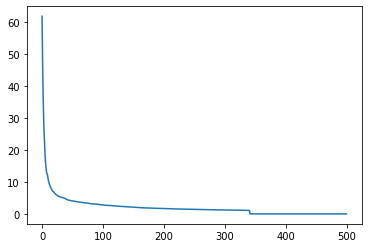

In [5]:
plt.plot(range(len(Gbdt.train_score_)), Gbdt.train_score_)

In [6]:
Gbdt.feature_importances_

array([0.10633557, 0.00688275, 0.02614752, 0.00773172, 0.06631719,
       0.1876929 , 0.11302279, 0.1269625 , 0.03119745, 0.05640809,
       0.04921372, 0.10546461, 0.11956437])

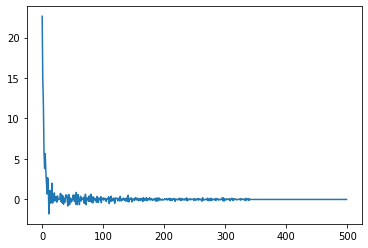

In [7]:
plt.plot(range(len(Gbdt.oob_improvement_)), Gbdt.oob_improvement_)

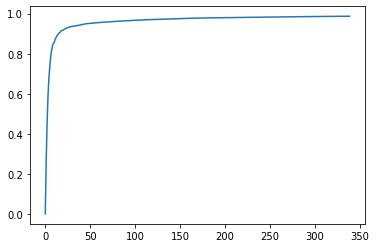

In [8]:
scores = [r2_score(y, pred) for pred in Gbdt.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [9]:
Gbdt.get_params()

{'learning_rate': 0.1,
 'loss': 'ls',
 'n_estimators': 340,
 'n_iter_no_change': 2,
 'random_state': None,
 'subsample': 0.5,
 'tol': 0.0025,
 'tree_params': {'criterion': 'mse', 'max_depth': 3}}

 ## Sklearn GBDT

In [11]:
gbr = GradientBoostingRegressor(criterion='mse', loss='ls', n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.5)
gbr.fit(x, y)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
r2_score(y, gbr.predict(x))

0.9729259602807636

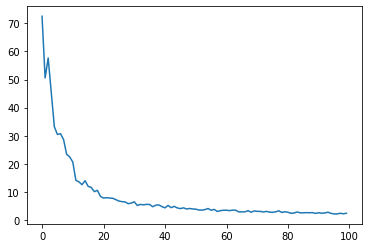

In [13]:
plt.plot(range(len(gbr.train_score_)), gbr.train_score_)

In [14]:
gbr.feature_importances_

array([0.0297713 , 0.00087797, 0.00331777, 0.00182798, 0.04163718,
       0.32555183, 0.02041862, 0.09988601, 0.00827489, 0.01878644,
       0.03153965, 0.01090847, 0.40720189])

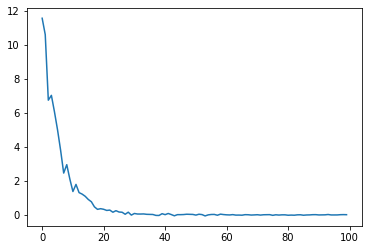

In [15]:
plt.plot(range(len(gbr.oob_improvement_)), gbr.oob_improvement_)

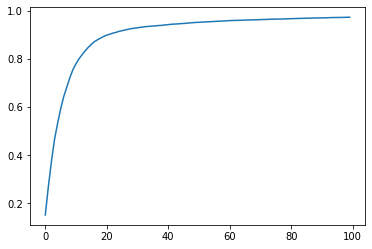

In [16]:
scores = [r2_score(y, pred) for pred in gbr.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)